# Plot logoplot

In [2]:
import seaborn as sns
import seqlogo
import matplotlib.pyplot as plt
import logomaker
import pickle as pkl
import pandas as pd
import numpy as np
%matplotlib inline

In [41]:
import matplotlib.font_manager
set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

{'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmb10',
 'cmex10',
 'cmmi10',
 'cmr10',
 'cmss10',
 'cmsy10',
 'cmtt10'}

In [3]:
def get_position_frequency_matrix(index_names,prot='TEV'):
    if prot == 'HCV':
        index_names = [x[1:len(index_names[0])-3] for x in index_names]
    elif prot == 'TEV':
        index_names = [x[1:len(index_names[0])-2] for x in index_names]
    total = len(index_names)
    aaa = "ACDEFGHIKLMNPQRSTVWY"
    pfm = np.zeros((len(index_names[0]),20)) # position: 5, number of aa: 20
#     if len(index_names[0]) > 5:
#         index_names = np.asarray([x[1:6] for x in index_names])
    for pos in range(len(index_names[0])):
        strings = np.asarray([x[pos] for x in index_names])
        for aa in range(20):
            pfm[pos,aa] = np.sum(strings == aaa[aa]) / total
    return pfm

def plot_heatmap(pfm):
    aaa = "ACDEFGHIKLMNPQRSTVWY"
    sns.heatmap(pfm, xticklabels = aaa, yticklabels = ['P'+str(i) for i in range(7,0,-1)] + ['P' + str(j) for j in range(-1,-5)], cmap='bwr')
def plot_seqlogo(pfm,upfm=None):
    aaa = "ACDEFGHIKLMNPQRSTVWY"
    ppm = pd.DataFrame(pfm, columns = list(aaa))
    if upfm is not None:
        uppm = pd.DataFrame(upfm, columns = list(aaa))
    fig, ax = plt.subplots(1,1,figsize=[6,5])
    #plt.style.use('default')
    font = {'family' : 'Times New Roman',
#         'serif'  : 'Computer Modern',
#         'monospace': 'Computer Modern',
        'size'   : 28}
    crp_logo = logomaker.Logo(ppm,
                              ax = ax,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          width=.8)
                             #color_scheme='dmslogo_funcgroup')#'skylign_protein')
    crp_logo2 = logomaker.Logo(-uppm,
                              ax = ax,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold',
                          width=.8, flip_below=False)
                              #color_scheme='dmslogo_funcgroup')#'skylign_protein')
    # style using Logo methods
    crp_logo.style_spines(visible=False)
    crp_logo.style_spines(spines=['left'], visible=True)
    crp_logo.style_xticks(fmt='%d', anchor=0) #rotation=90
    
    crp_logo2.style_spines(visible=False)
    crp_logo2.style_spines(spines=['left'], visible=True)
    crp_logo2.style_xticks(fmt='%d', anchor=0) #rotation=90
    
    # style using Axes methods
    crp_logo.ax.set_xticklabels(labels=["P6","P5","P4","P3","P2","P1","P1'"], fontdict={'fontsize':18}) #["P6","P5","P4","P3","P2","P1","P1'"] #"P7", "P6","P5","P4","P3","P2","P1","P1'", "P2'","P3'"
    crp_logo.ax.set_yticks(ticks=[-1.0, -0.5, 0, 0.5, 1.0])
    crp_logo.ax.set_yticklabels(labels=['1.0','0.5','0','0.5','1.0'], fontdict={'fontsize':18})
    crp_logo.ax.set_ylabel("Frequency", labelpad=-1, fontsize=20)
    crp_logo.ax.xaxis.set_ticks_position('none')
    crp_logo.ax.xaxis.set_tick_params(pad=-1)
    
    crp_logo2.ax.set_xticklabels(labels=["P6","P5","P4","P3","P2","P1","P1'"], fontdict={'fontsize':18}) #["P6","P5","P4","P3","P2","P1","P1'"] #"P7", "P6","P5","P4","P3","P2","P1","P1'", "P2'","P3'"
    crp_logo2.ax.set_yticks(ticks=[-1.0, -0.5, 0, 0.5, 1.0])
    crp_logo2.ax.set_yticklabels(labels=['1.0','0.5','0','0.5','1.0'], fontdict={'fontsize':18})
    crp_logo2.ax.set_ylabel("Frequency", labelpad=-1, fontsize=20)
    crp_logo2.ax.xaxis.set_ticks_position('none')
    crp_logo2.ax.xaxis.set_tick_params(pad=-1)
    

In [15]:
def logo_plot(tmp,prot='TEV'):
    tmp['label'] = tmp['label'].str.upper()
    seqlistC = tmp[tmp['label'] == 'CLEAVED']['seq'].values
    seqlistU = tmp[tmp['label'] == 'UNCLEAVED']['seq'].values

    cpfm = get_position_frequency_matrix(seqlistC,prot)
    npfm = get_position_frequency_matrix(seqlistU,prot)
    plot_seqlogo(cpfm,npfm)

In [6]:
df = pd.read_csv('TEV_David_Liu_mutants_sequences_labels_no_single_three_libraries_duplicates_used4structGen_05_10_2022.csv',
                index_col=0)
seq_df = df['seq'].astype(str).str.replace('.','',regex=False)
df['seq'] = seq_df
df.head()

,mutant,seq,label
0,N176I,TAHLYFQSGT,CLEAVED
1,N176I,TANAYFQSGT,CLEAVED
2,N176I,TANLYFASGT,CLEAVED
3,N176I,TCYLYFQSGT,CLEAVED
4,N176I,TDALYFQSGT,CLEAVED


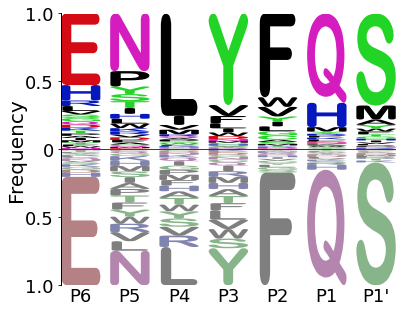

In [117]:
# tmp = df[df['mutant'] == 'WT']
tmp = df.copy()
logo_plot(tmp)
plt.savefig('tev_combined_logoPlot.png', bbox_inches='tight',dpi=1200)

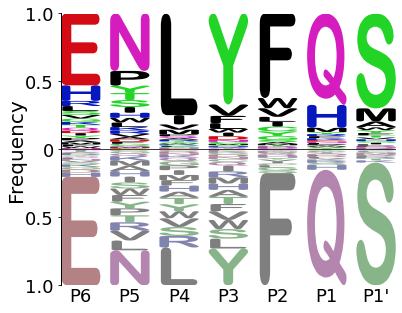

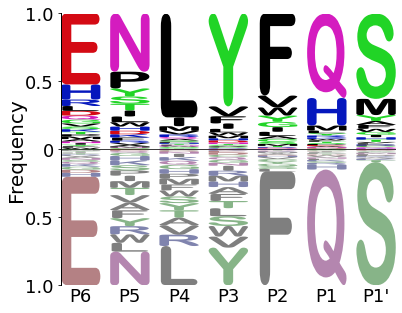

In [127]:
# cleaved and uncleaved
testInd = np.loadtxt('/Users/cplu/Downloads/Documents/RESEARCH/GCNN/TEV/data/ind.TEV_all_binary_10_ang_aa_energy_7_energyedge_5_hbond.test.index',
                    dtype=int)
testInd = np.sort(testInd)
trainInd = [x for x in range(df.shape[0]) if x not in testInd]
df_train = df.iloc[trainInd, :]
df_test = df.iloc[testInd, :]
logo_plot(df_train)
plt.savefig('tev_combined_logoPlot_train.png', bbox_inches='tight',dpi=1200)

logo_plot(df_test)
plt.savefig('tev_combined_logoPlot_test.png', bbox_inches='tight',dpi=1200)


In [17]:
# HCV protease
df = pd.DataFrame()
for file in ['HCV.txt','HCV_A171T.txt', 'HCV_D183A.txt', 'HCV_R170K_A171T_D183A.txt']:
    tmp_df = pd.read_csv('../PGCN/Bioinformatics_Draft_Paper/data/HCV/' + file, delimiter='\t')
    df = pd.concat([df, tmp_df])
seq_df = df['Sequence'].astype(str).str.replace('.','',regex=False)
df['seq'] = seq_df
df['label'] = df['Result']
df.head()



,Sequence,Result,seq,label
0,AYYYEPC.ASHL,CLEAVED,AYYYEPCASHL,CLEAVED
1,AYYTTQC.ASHL,CLEAVED,AYYTTQCASHL,CLEAVED
2,AYYTIQC.ASHL,CLEAVED,AYYTIQCASHL,CLEAVED
3,AYYTHYC.ASHL,CLEAVED,AYYTHYCASHL,CLEAVED
4,AYYTHAC.ASHL,CLEAVED,AYYTHACASHL,CLEAVED


findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


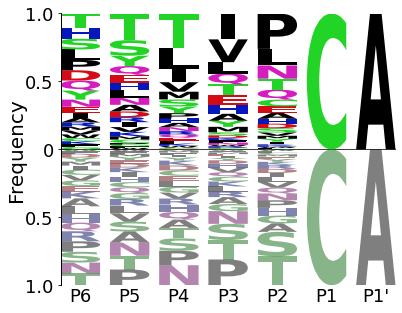

In [5]:
logo_plot(df,prot='HCV')
plt.savefig('figs/hcv_combined_logoPlot.png', bbox_inches='tight',dpi=1200)

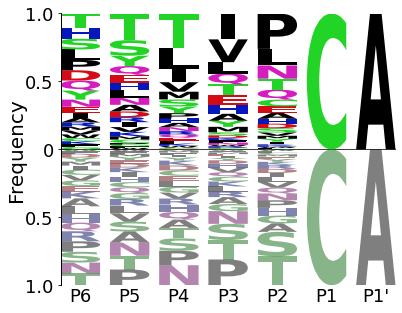

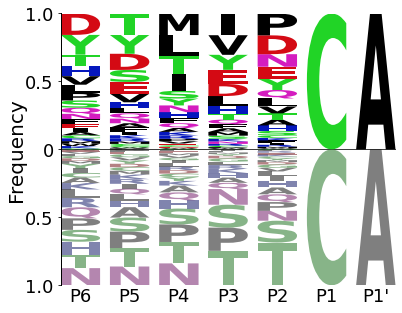

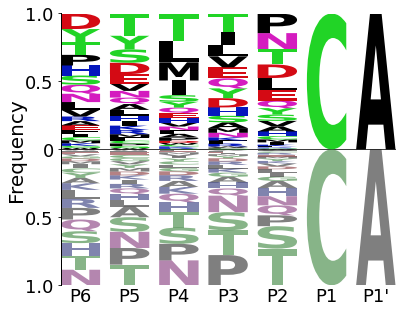

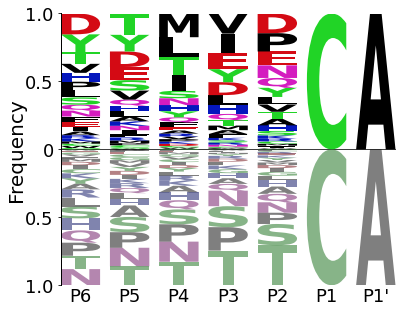

In [16]:
for file in ['HCV.txt','HCV_A171T.txt', 'HCV_D183A.txt', 'HCV_R170K_A171T_D183A.txt']:
    tmp_df = pd.read_csv('../PGCN/Bioinformatics_Draft_Paper/data/HCV/' + file, delimiter='\t')
    seq_df = tmp_df['Sequence'].astype(str).str.replace('.','',regex=False)
    tmp_df['seq'] = seq_df
    tmp_df['label'] = tmp_df['Result']
    logo_plot(tmp_df,prot='HCV')
    plt.savefig('figs/hcv_' + file.split('.')[0] + '_logoPlot.png', bbox_inches='tight',dpi=1200)

In [3]:
df = pd.read_csv('/mnt/d/PGCN/Summaries/data/TEV/TEV_David_Liu_mutants_sequences_labels_no_single_three_libraries_duplicates_used4structGen_05_10_2022.csv',
                index_col=0)
testInd = np.loadtxt('/mnt/d/PGCN/Summaries/data/TEV/combinedInputData/ind.TEV_all_binary_10_ang_aa_energy_7_energyedge_5_hbond.test.index',
                    dtype=int)
testInd = np.sort(testInd)
trainInd = [x for x in range(df.shape[0]) if x not in testInd]
df_train = df.iloc[trainInd, :]
df_test = df.iloc[testInd, :]

In [6]:
mutants = list(set(list(df['mutant'].values)))

In [7]:
df

,mutant,seq,label
0,N176I,TAHLYFQ.SGT,CLEAVED
1,N176I,TANAYFQ.SGT,CLEAVED
2,N176I,TANLYFA.SGT,CLEAVED
3,N176I,TCYLYFQ.SGT,CLEAVED
4,N176I,TDALYFQ.SGT,CLEAVED
...,...,...,...
5420,L2F,TVSPYFQ.SGT,UNCLEAVED
5421,L2F,TVSTYFQ.SGT,UNCLEAVED
5422,L2F,TWRKYFQ.SGT,UNCLEAVED
5423,L2F,TWRSYFQ.SGT,UNCLEAVED


In [8]:
for mu in mutants:
    print(mu)
    tmp_df = df[df['mutant'] == mu]
    print(tmp_df.shape[0])
    print(tmp_df[tmp_df['label'] == 'CLEAVED'].shape[0])
    print(tmp_df[tmp_df['label'] == 'UNCLEAVED'].shape[0])

E107D_D127A_S135F_R203Q_K215E
143
114
29
I138T_N171D_N176T
148
74
74
V209M_W211I_M218F
226
136
90
L2F
3139
1124
2015
T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E
419
223
196
E107D_D127A_S135F
93
59
34
H28L_T30A
78
40
38
WT
518
402
116
N176I
374
248
126
T146S_D148P_S153N_S170A_N177M
287
188
99


In [9]:
for mu in mutants:
    print(mu)
    tmp_df = df_train[df_train['mutant'] == mu]
    print(tmp_df.shape[0])
    print(tmp_df[tmp_df['label'] == 'CLEAVED'].shape[0])
    print(tmp_df[tmp_df['label'] == 'UNCLEAVED'].shape[0])

E107D_D127A_S135F_R203Q_K215E
96
75
21
I138T_N171D_N176T
110
57
53
V209M_W211I_M218F
162
98
64
L2F
2184
785
1399
T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E
287
153
134
E107D_D127A_S135F
67
39
28
H28L_T30A
59
30
29
WT
371
286
85
N176I
264
181
83
T146S_D148P_S153N_S170A_N177M
197
124
73


In [11]:
for mu in mutants:
    print(mu)
    tmp_df = df_test[df_test['mutant'] == mu]
    print(tmp_df.shape[0])
    print(tmp_df[tmp_df['label'] == 'CLEAVED'].shape[0])
    print(tmp_df[tmp_df['label'] == 'UNCLEAVED'].shape[0])

E107D_D127A_S135F_R203Q_K215E
47
39
8
I138T_N171D_N176T
38
17
21
V209M_W211I_M218F
64
38
26
L2F
955
339
616
T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E
132
70
62
E107D_D127A_S135F
26
20
6
H28L_T30A
19
10
9
WT
147
116
31
N176I
110
67
43
T146S_D148P_S153N_S170A_N177M
90
64
26


In [10]:
df_train.shape, df_test.shape

((3797, 3), (1628, 3))